<a href="https://colab.research.google.com/github/yavarnaphanesh/Machine_Learning_projects/blob/yavarnaphanesh-Nifty_Bank_Live/Bank_Nifty_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your historical data into a DataFrame.
# Replace 'your_data.csv' with the path to your data file.
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5ENSEBANK?period1=1667915609&period2=1699451609&interval=1d&events=history&includeAdjustedClose=true')
# Feature engineering (if needed) - create additional features here.
# You can use open, high, low, close, and price_variation as features.
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Variation    float64
dtype: object


In [31]:
data['Variation'] = data['Open'].diff()
data['Variation'].fillna(data['Open'], inplace=True)
data.dropna(subset=['Variation'], inplace=True)
data.head

<bound method NDFrame.head of            Date          Open          High           Low         Close  \
0    2022-11-09  41914.851563  41948.898438  41667.898438  41783.199219   
1    2022-11-10  41462.851563  41643.898438  41318.601563  41603.750000   
2    2022-11-11  42163.398438  42345.500000  41918.101563  42137.050781   
3    2022-11-14  42177.550781  42231.449219  41965.449219  42076.750000   
4    2022-11-15  42234.851563  42450.050781  42079.550781  42372.699219   
..          ...           ...           ...           ...           ...   
244  2023-11-02  43018.699219  43271.500000  42796.449219  43017.199219   
245  2023-11-03  43318.300781  43416.101563  43221.000000  43318.250000   
246  2023-11-06  43627.750000  43648.699219  43415.199219  43619.398438   
247  2023-11-07  43598.851563  43799.351563  43283.851563  43737.898438   
248  2023-11-08  43791.800781  43797.550781  43547.750000  43587.148438   

        Adj Close    Volume     Variation  
0    41782.714844  490500

In [27]:

# Define the target variable (market price increase or decrease).
# You can use 'price_variation' or create a binary target variable based on your criteria.
data['target'] = data['Variation'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Split the data into features (X) and the target variable (y).
X = data[['Open', 'High', 'Low', 'Close']]
y = data['target']

# Split the data into training and testing sets (80% for training, 20% for testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set.
y_pred = model.predict(X_test)

# Calculate the accuracy of the model.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report for more detailed evaluation.
print(classification_report(y_test, y_pred))

# Predict market price increase or decrease for future data.
# Replace 'new_data' with the features of the day you want to predict.
new_data = pd.DataFrame({'Open': [100], 'High': [110], 'Low': [95], 'Close': [105]})
predicted_result = model.predict(new_data)

print(f'Predicted Market Price: {predicted_result[0]}')


Accuracy: 0.70
              precision    recall  f1-score   support

    Decrease       0.57      0.84      0.68        19
    Increase       0.86      0.61      0.72        31

    accuracy                           0.70        50
   macro avg       0.72      0.73      0.70        50
weighted avg       0.75      0.70      0.70        50

Predicted Market Price: Decrease


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your historical data into a DataFrame.
# Replace 'your_data.csv' with the path to your data file.

null_values = data.isnull()
print(null_values)
null_count = null_values.sum()
print(null_count)

      Date   Open   High    Low  Close  Adj Close  Volume  Variation
0    False  False  False  False  False      False   False      False
1    False  False  False  False  False      False   False      False
2    False  False  False  False  False      False   False      False
3    False  False  False  False  False      False   False      False
4    False  False  False  False  False      False   False      False
..     ...    ...    ...    ...    ...        ...     ...        ...
244  False  False  False  False  False      False   False      False
245  False  False  False  False  False      False   False      False
246  False  False  False  False  False      False   False      False
247  False  False  False  False  False      False   False      False
248  False  False  False  False  False      False   False      False

[248 rows x 8 columns]
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Variation    0
dtype: int64


In [34]:
# Use the 'Price_variation' column as the target variable.
data = data[['Variation']]

In [35]:
# Convert the data to numpy arrays and scale the values to [0, 1].
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define the sequence length (number of time steps to look back).
sequence_length = 10

# Create sequences of data for training.
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Build an LSTM model.
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model.
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model.
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')

Epoch 1/50
6/6 [==============================] - 2s 7ms/step - loss: 0.0060
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 11/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 13/50
6/6 [==============================] - 0s 6ms/step - loss: 0.

2/2 [==============================] - 0s 9ms/step


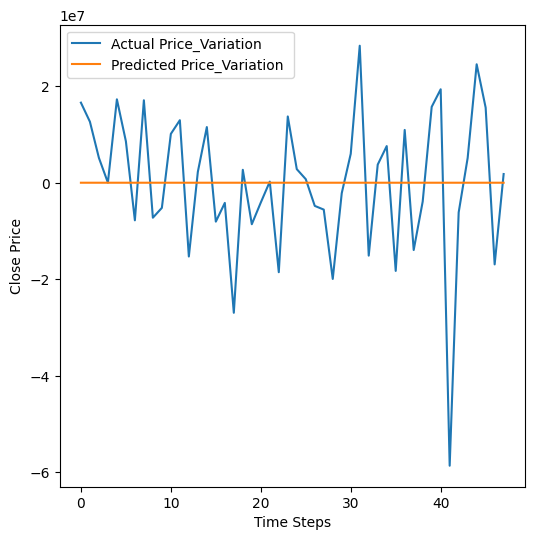

1/1 [==============================] - 0s 31ms/step
Predicted Next Day Price_Variation: 243.29


In [38]:

# Make predictions on the testing set.
y_pred = model.predict(X_test)

# Inverse transform the scaled data to get actual values.
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot the actual and predicted prices.
plt.figure(figsize=(6, 6))
plt.plot(y_test, label='Actual Price_Variation ')
plt.plot(y_pred, label='Predicted Price_Variation ')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.show()

# Predict the next day's closing price.
last_sequence = X[-1]
next_day_sequence = np.append(last_sequence[1:], y[-1])
next_day_sequence = next_day_sequence.reshape(1, sequence_length, 1)
next_day_prediction = model.predict(next_day_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print(f'Predicted Next Day Price_Variation: {next_day_prediction[0][0]:.2f}')
